In [4]:
## read feature data file 
import pandas as pd

features = pd.read_csv('features.csv') #,header=None) 
features.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,emotion,emotionID
0,0,45,179,48,210,52,241,60,272,76,...,209,264,179,258,168,258,156,256,neutral,0
1,1,43,176,47,207,49,240,57,271,74,...,208,268,179,260,168,260,156,258,neutral,0
2,2,31,191,36,225,44,258,58,292,80,...,214,274,187,272,175,273,163,272,neutral,0
3,3,53,169,57,201,61,234,68,266,83,...,206,267,181,262,168,263,155,260,neutral,0
4,4,54,176,59,208,63,241,70,272,86,...,213,266,186,263,173,265,160,262,neutral,0


[[310   0   0   0   0   0   0   0]
 [  0  45   0   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0]
 [  0   0   0  58   0   0   0   0]
 [  0   0   0   0  25   0   0   0]
 [  0   0   0   0   0  69   0   0]
 [  0   0   0   0   0   0  28   0]
 [  0   0   1   0   0   0   0  82]]


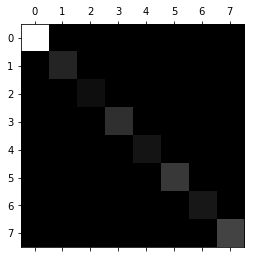

In [34]:
## First, LDA using all the samples!
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

X = features.iloc[:,0:135].as_matrix()   # feature points
y = features['emotionID'].as_matrix()    # emotion id: 0 ~ 7

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

# error analysis by calc confusion matrix
conf_mx=confusion_matrix(y, y_pred)
print(conf_mx)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


Very good!!!
Onely one suprise (7) image is misclassified to "contempt" (2)
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]


In [38]:
## Next, LDA with 10-fold cross validation!
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

predicted = cross_val_predict(lda, X, y, cv=10)
accuracy_score(y, predicted) 

0.94811320754716977